### Logistic Regression 


The process of predicting a qualitative -- or categorical -- variable
is known as classification. Predicting a qualitative response for an observation can be referred to as classifying that observation, since it involves assigning the observation to a category, or class. Classification problems occur often, perhaps even more so than regression
problems. 

#### Question: When and how to use linear regression? 

<img src="../../slides/Figures/logistic-regression.png">

![\large P(Y=1|X)=\frac{e^Y}{e^Y}](https://latex.codecogs.com/svg.latex?\large&space;P(Y=1|X)=\frac{e^Y}{1+e^Y}) 

In the bivariate case:

![\large Y=b_0+b_1X](https://latex.codecogs.com/svg.latex?\large&space;Y=b_0+b_1X) 


### The Data


For this lecture, we're going to use the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic/data). This is a very famous data set in the Applied ML tutorials and it's an easy way to familiarize with some libraries. 

We'll be trying to predict survival of Titanic passengers using Logistic Regresssion as classification algorithm.

We will start with some steps towards feature engeneering. 

`Coming up with features is difficult, time consuming, requires expert knowledge. "Applied Machine Learning" is basically feature engenieering.` -- Andrew Ng

Let's start by reading in the `train.csv` file into a pandas dataframe.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data.

### Missing Data

We can use seaborn to visualize missing data.

<AxesSubplot:>

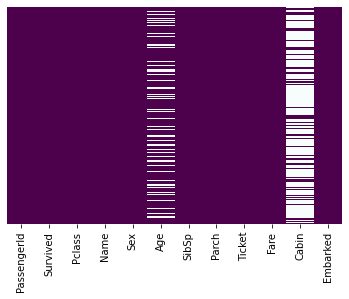

In [5]:
import seaborn as sns
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

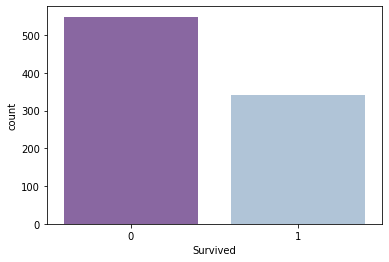

In [6]:
sns.set_style(None)
sns.countplot(x='Survived', data=train, palette='BuPu_r')

<AxesSubplot:xlabel='Sex', ylabel='count'>

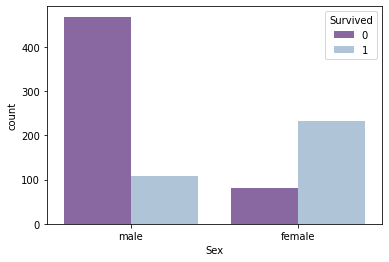

In [7]:
sns.countplot(x='Sex', hue='Survived', data=train, palette='BuPu_r')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

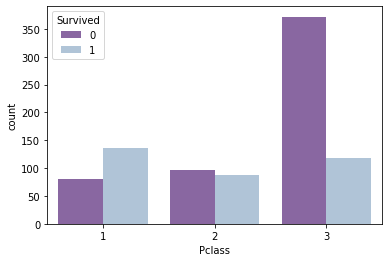

In [8]:
sns.countplot(x='Pclass', hue='Survived', data=train, palette='BuPu_r')

/Users/ariedamuco/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

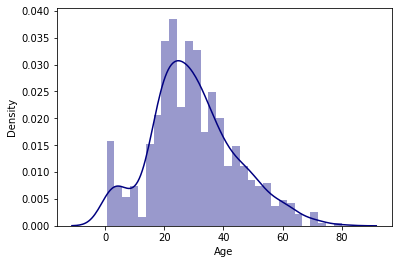

In [9]:
sns.distplot(train['Age'], color='navy', bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

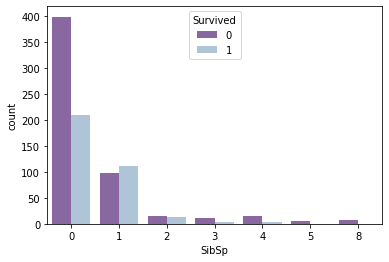

In [10]:
sns.countplot(x='SibSp', hue='Survived', data=train, palette='BuPu_r')

/Users/ariedamuco/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

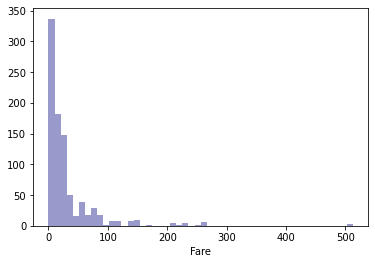

In [11]:
sns.distplot(train['Fare'], color='navy', bins=50, kde=False)

### Data Cleaning

The algorithms do not understand missing data so we need to tell the program exactly what to do with them. If we drop all missings observations, we drop a big chunk of the dataset. If we think age would be a good predictor of survival, then we should try to replace missing values.

- What are common approaches to deal with missing data?
- Make sure you know how does scikit-learn and pandas deal with missings.

Let's do a bit more explorations such as boxplots by survival category. 

<AxesSubplot:xlabel='Survived', ylabel='Age'>

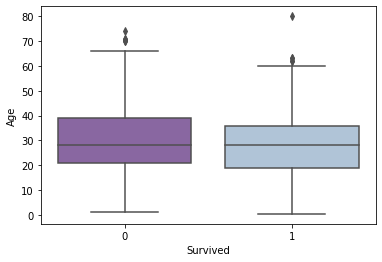

In [12]:
sns.boxplot(x='Survived', y='Age', data=train, palette='BuPu_r')

### Challenge: Interpret the boxplot of age (by survival).

/Users/ariedamuco/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


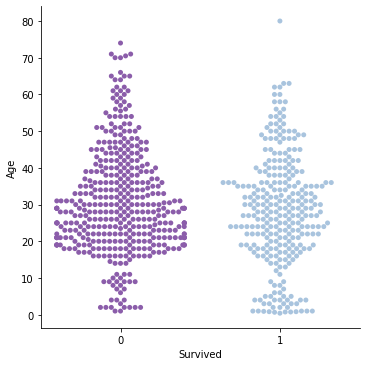

In [13]:
sns.catplot(y='Age', x='Survived', kind="swarm",  data=train,palette='BuPu_r')

/Users/ariedamuco/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


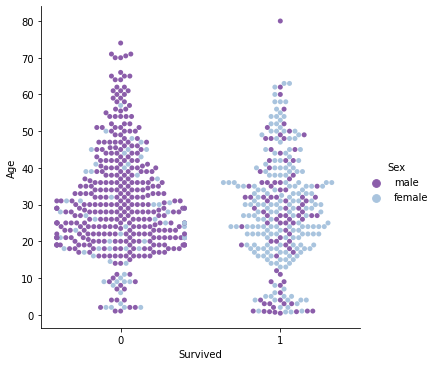

In [14]:
sns.catplot( x='Survived', y='Age', hue="Sex", kind="swarm", data=train, palette='BuPu_r')

### Challenge: Plot age by passanger class. Interpret your plot.

### Challenge: Make explorations of your own choosing

In [15]:
#Now, let's finally replace some missing values :-)

train["Age"] = train.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

<AxesSubplot:>

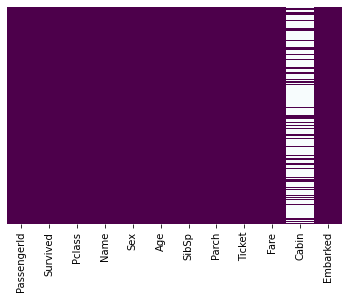

In [16]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='BuPu_r')

The Cabin column has a lot of missing values. We can create an indicator variable which takes value one in case cabin is missing.

In [17]:
train['cabin_missing'] = pd.isna(train['Cabin'])

In [18]:
train['cabin_missing'].describe()

count      891
unique       2
top       True
freq       687
Name: cabin_missing, dtype: object

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [20]:
#train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas. Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  cabin_missing  891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 84.5+ KB


In [22]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [23]:
train.drop(['Sex','Embarked','Name','Ticket', 'PassengerId', 'Pclass', 'Cabin'], axis=1, inplace=True)

In [24]:
train = pd.concat([train, sex, embark, pclass], axis=1)

In [25]:
train.head()

,Survived,Age,SibSp,Parch,Fare,cabin_missing,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,1,0,1,0,1
1,1,38.0,1,0,71.2833,False,0,0,0,0,0
2,1,26.0,0,0,7.9250,True,0,0,1,0,1
3,1,35.0,1,0,53.1000,False,0,0,1,0,0
4,0,35.0,0,0,8.0500,True,1,0,1,0,1


### Train Test Split
Let's start by splitting our data into a training set and test set.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = train.drop('Survived',axis=1)
y = train['Survived']
seed = 12

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, stratify=y)

In [29]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Prediction

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression()
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)

In [32]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
X_test = preprocessing.scale(X_test)
predictions = logreg.predict(X_test)

In [34]:
predictions

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1])

### Model Evaluation

We can check precision, recall,f1-score using classification report.

<img src="../../slides/Figures/confusion-matrix.png">

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       137
           1       0.79      0.73      0.76        86

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [37]:
print(confusion_matrix(y_test, predictions))

[[120  17]
 [ 23  63]]


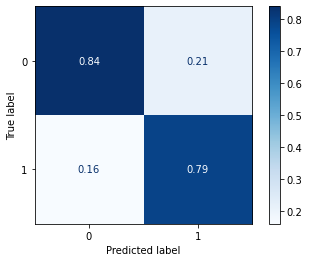

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

In [39]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Make sure you know what you are doing. Without understanding data, algorithm, and output, you might have very misleading results.

In [40]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [41]:
#print(confusion_matrix(y_test,dummy_clf.predict(X_test)))

In [42]:
print(classification_report(y_test, dummy_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       137
           1       0.00      0.00      0.00        86

    accuracy                           0.61       223
   macro avg       0.31      0.50      0.38       223
weighted avg       0.38      0.61      0.47       223



/Users/ariedamuco/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
dummy_clf.score(y_test, dummy_clf.predict(X_test))

1.0

In [44]:
dummy_clf.score(y_test, logreg.predict(X_test))

0.6412556053811659

### Challenge: Predict survival using the test dataset. How would you approach this exercise in terms of preprocessing and feature extraction?

<img src="../../slides/Figures/threefold-split.png">

### References
- Check [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) from Scikit Learn

- Check [Confusion Matrx](https://en.wikipedia.org/wiki/Confusion_matrix)

- Check [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)

- [Plot confusion matrix](https://stackoverflow.com/questions/61466961/what-do-the-normalize-parameters-mean-in-sklearns-confusion-matrix)

- [Slides from Andreas Mueller](https://github.com/amueller/COMS4995-s19/tree/master/slides)

- [An Overview of General Performance Metrics of
Binary Classifier Systems](https://arxiv.org/pdf/1410.5330.pdf)